In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import warnings

style.use('ggplot')
sns.set(palette='terrain')

warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv('sc_stats.csv')
df.head()

,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,pf,tov,pts,plus_minus
0,35:39,7,12,0.583,0,1,0.000,0,0,NaN,1,1,2,7,4,0,2,2,14,7
1,39:05,5,9,0.556,2,3,0.667,0,0,NaN,0,2,2,4,1,0,5,3,12,-19
2,28:27,3,6,0.500,1,2,0.500,0,0,NaN,0,5,5,9,2,0,4,1,7,-4
3,21:32,1,5,0.200,0,1,0.000,3,4,0.75,0,1,1,3,0,0,6,0,5,-13
4,31:15,4,8,0.500,1,2,0.500,0,2,0.00,1,3,4,6,0,0,4,5,9,-5


In [89]:
def convert_mp(mp):
    minutes, sec = mp.split(':')
    return int(minutes) + round(int(sec) / 60, 5)

In [90]:
df['time played'] = df['mp'].apply(lambda row: convert_mp(row))

In [91]:
df.drop('mp', axis=1, inplace=True)

In [92]:
df.head()

,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,pf,tov,pts,plus_minus,time played
0,7,12,0.583,0,1,0.000,0,0,NaN,1,1,2,7,4,0,2,2,14,7,35.65000
1,5,9,0.556,2,3,0.667,0,0,NaN,0,2,2,4,1,0,5,3,12,-19,39.08333
2,3,6,0.500,1,2,0.500,0,0,NaN,0,5,5,9,2,0,4,1,7,-4,28.45000
3,1,5,0.200,0,1,0.000,3,4,0.75,0,1,1,3,0,0,6,0,5,-13,21.53333
4,4,8,0.500,1,2,0.500,0,2,0.00,1,3,4,6,0,0,4,5,9,-5,31.25000


In [93]:
df = df.fillna(0)

In [94]:
df.nunique()

fg              21
fga             33
fg_pct         115
fg3             14
fg3a            21
fg3_pct         65
ft              16
fta             16
ft_pct          24
orb              6
drb             14
trb             14
ast             17
stl              8
blk              3
pf               7
tov             12
pts             52
plus_minus      71
time played    531
dtype: int64

In [95]:
df.isna().sum(axis=0)

fg             0
fga            0
fg_pct         0
fg3            0
fg3a           0
fg3_pct        0
ft             0
fta            0
ft_pct         0
orb            0
drb            0
trb            0
ast            0
stl            0
blk            0
pf             0
tov            0
pts            0
plus_minus     0
time played    0
dtype: int64

In [96]:
df_neg_pm = df[df['plus_minus'] <= 0]
df_pos_pm = df[df['plus_minus'] > 0]

In [97]:
offense = (df_neg_pm.select_dtypes(exclude='object').columns).tolist()
offense.remove('drb')
offense.remove('trb')
offense.remove('orb')
offense.remove('stl')
offense.remove('blk')
offense.remove('pf')

# These statistics are repetitive. I will use their 'made' versions of the respective statistics.
# fg3a, I will be using fg3 representing the number of 3 pointers Stephen Curry made in that game.
# fgta, I will be using ft representing the number of free throws Stephen Curry made in that game. 

offense.remove('fg3a')
offense.remove('fta')
offense.remove('plus_minus')

defense = ['stl', 'blk', 'pf', 'tov']
rebounds = ['orb', 'drb', 'trb']

In [98]:
offense, defense, rebounds

(['fg',
  'fga',
  'fg_pct',
  'fg3',
  'fg3_pct',
  'ft',
  'ft_pct',
  'ast',
  'tov',
  'pts',
  'time played'],
 ['stl', 'blk', 'pf', 'tov'],
 ['orb', 'drb', 'trb'])

# Offensive Features Analysis

In [99]:
fontsize = 12.5
width = 20
height = 35

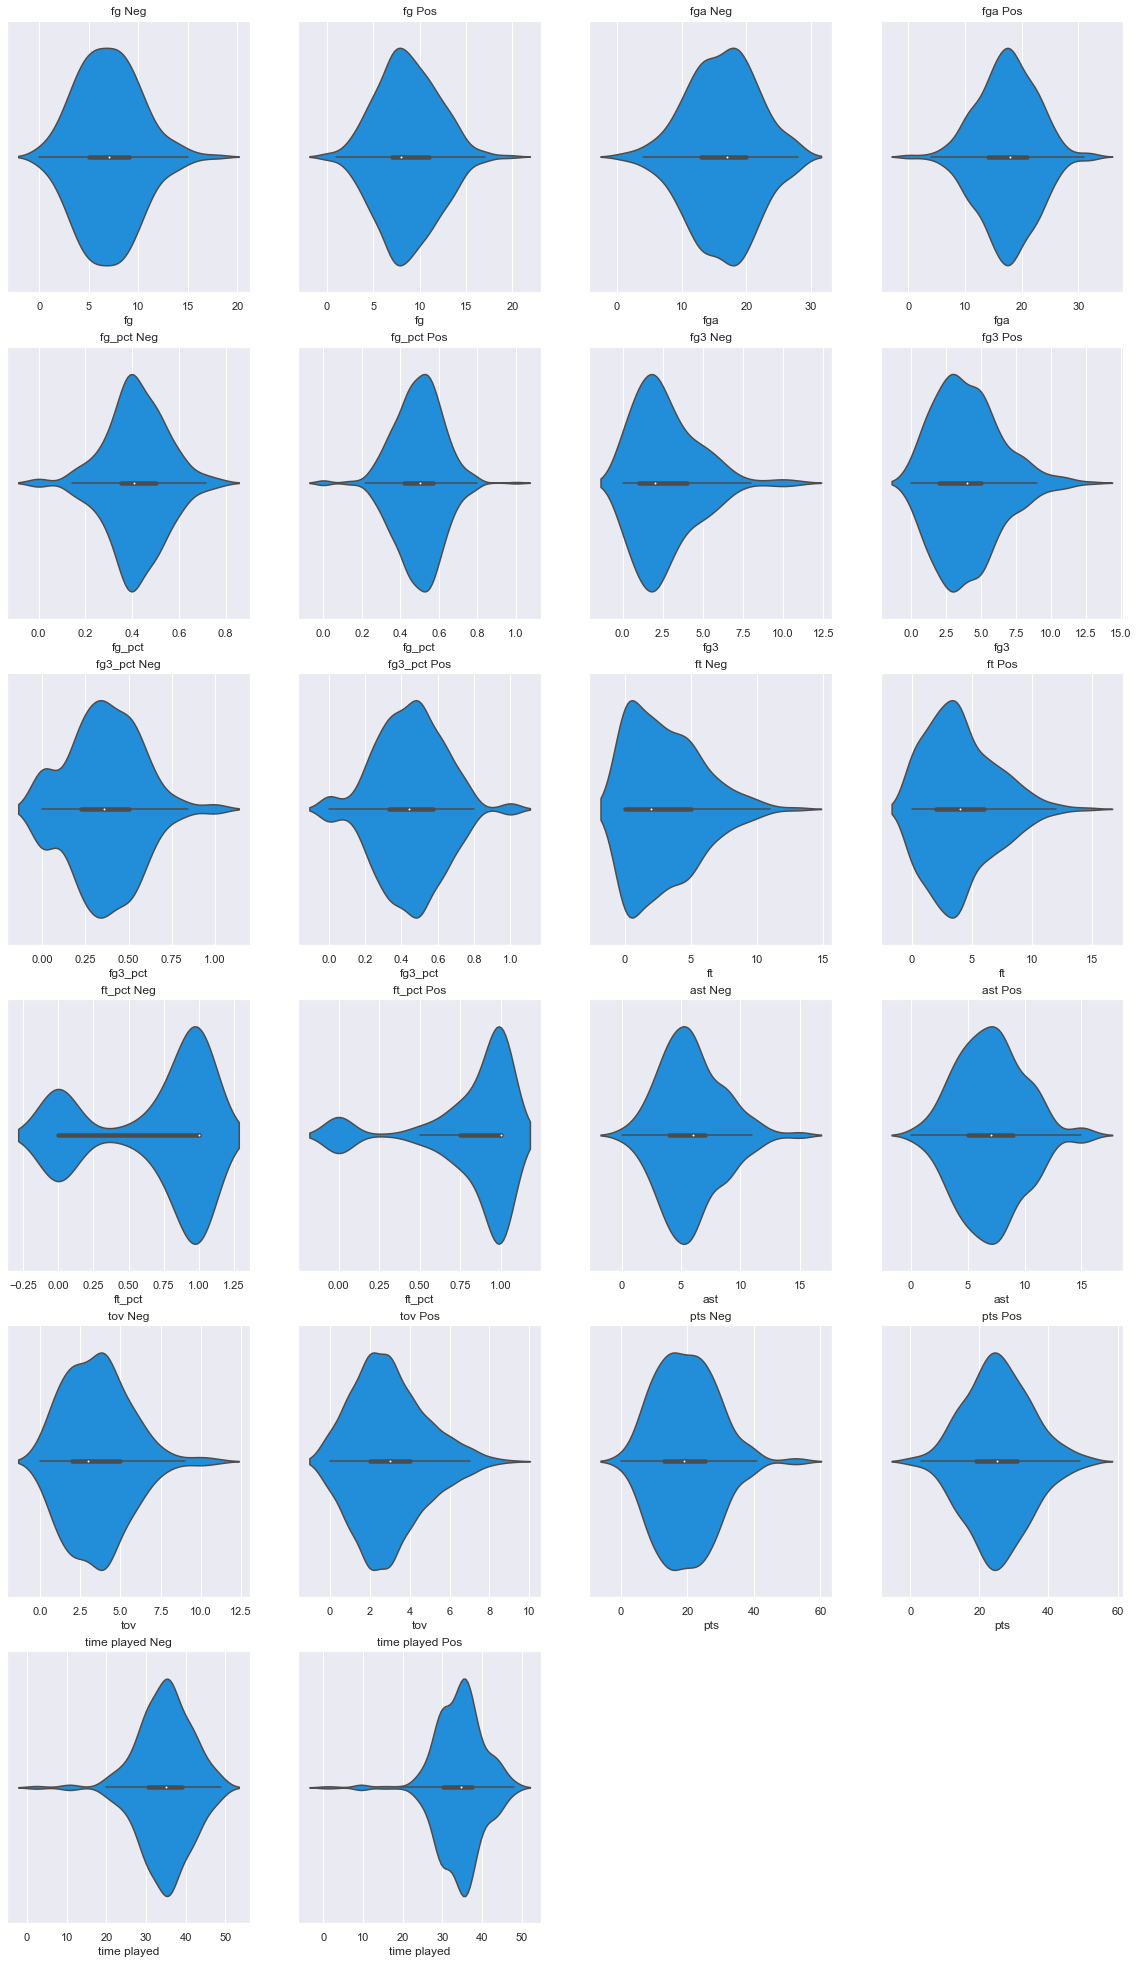

In [100]:
fig = plt.figure(1, figsize=(width, height))
i = 0

for col in offense:
    i += 1
    ax1 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.violinplot(x=df_neg_pm[col])
    ax1.set_title(f'{col} Neg')
    
    i += 1
    ax2 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.violinplot(x=df_pos_pm[col])
    ax2.set_title(f'{col} Pos')

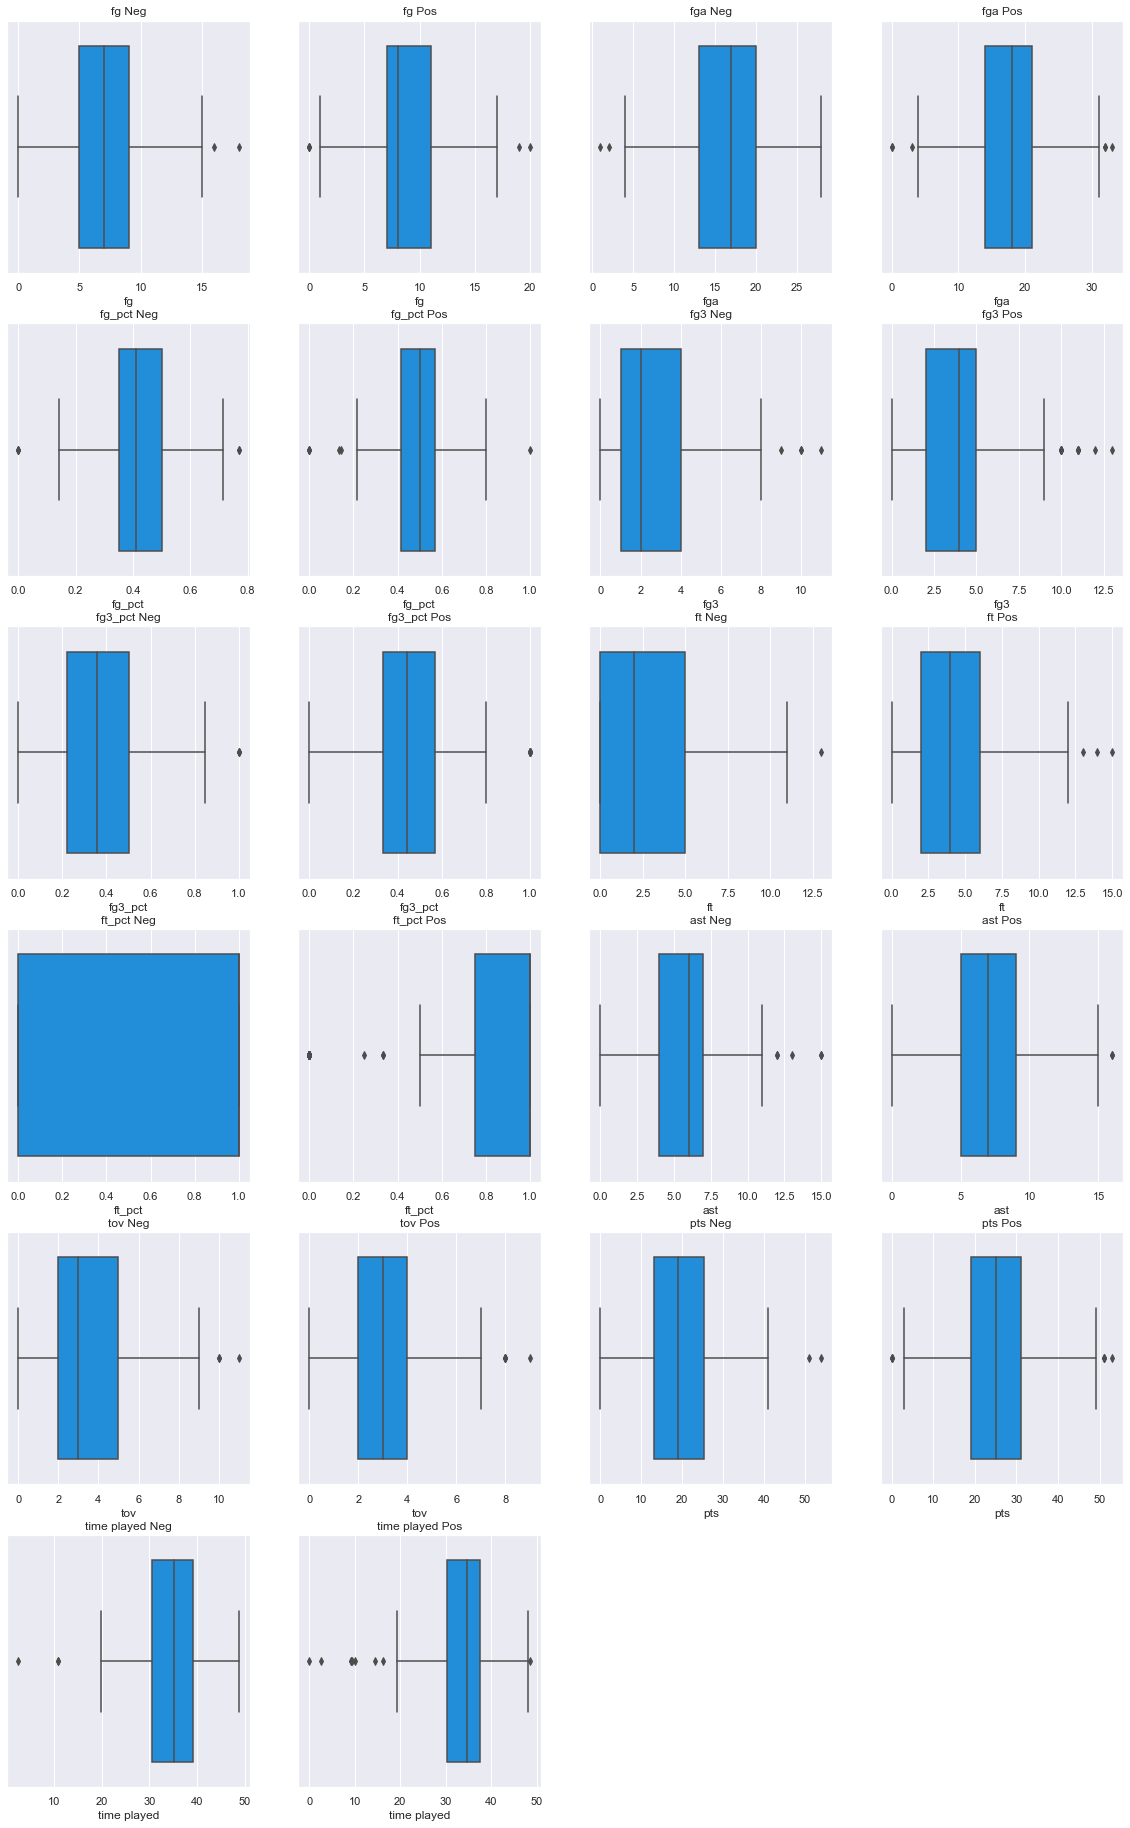

In [101]:
height = 32.5

fig = plt.figure(1, figsize=(width, height))
i = 0

for col in offense:
    i += 1
    ax1 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.boxplot(x=df_neg_pm[col])
    ax1.set_title(f'{col} Neg')
    
    i += 1
    ax2 = plt.subplot((len(offense) // 2) + 1, 4, i)
    sns.boxplot(x=df_pos_pm[col])
    ax2.set_title(f'{col} Pos')

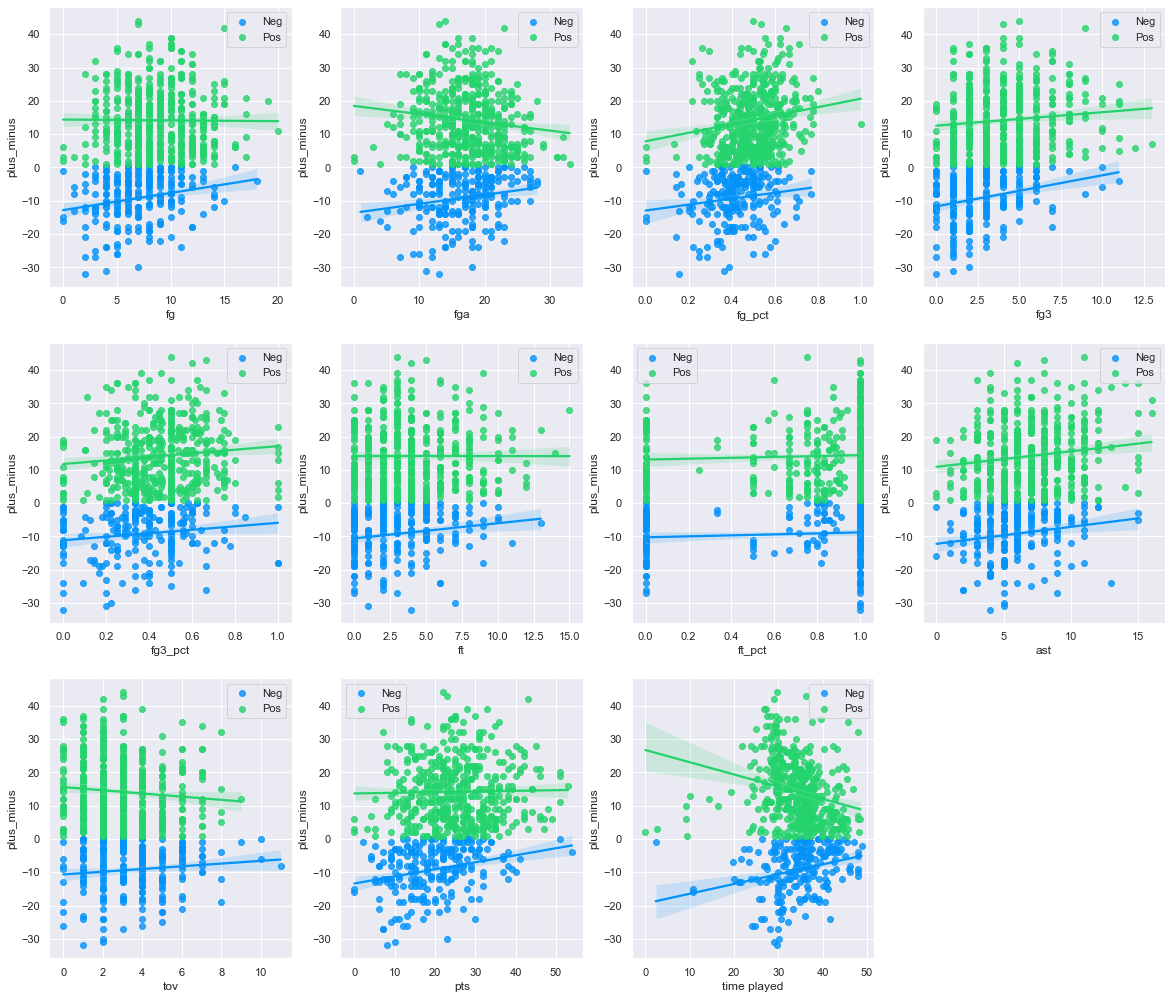

In [102]:
height = 17.5

fig = plt.figure(1, figsize=(width, height))
i = 0
rows = (len(offense) // 4) + 1

for col in offense:
    i += 1
    ax1 = plt.subplot(rows, 4, i)
    
    sns.regplot(df_neg_pm[col], df_neg_pm['plus_minus'], label='Neg') 
    sns.regplot(df_pos_pm[col], df_pos_pm['plus_minus'], label='Pos') 
    
    ax1.legend()

In [103]:
df_neg_pm['ast_tov_ratio'] = df_neg_pm['ast'].div(df_neg_pm['tov'].replace(0, np.inf))
df_pos_pm['ast_tov_ratio'] = df_pos_pm['ast'].div(df_pos_pm['tov'].replace(0, np.inf))

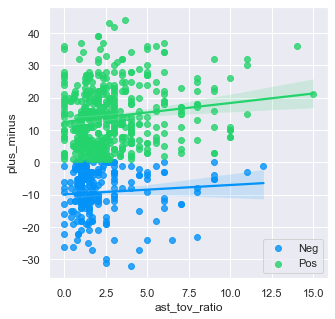

In [104]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['ast_tov_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['ast_tov_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

In [105]:
df_neg_pm['3fg_divided_by_fg'] = df_neg_pm['fg3'].div(df_neg_pm['fg'].replace(0, np.inf))
df_neg_pm['2fg_divided_by_fg'] = (df_neg_pm['fg'] - df_neg_pm['fg3']).div(df_neg_pm['fg'].replace(0, np.inf))

df_pos_pm['3fg_divided_by_fg'] = df_pos_pm['fg3'].div(df_pos_pm['fg'].replace(0, np.inf))
df_pos_pm['2fg_divided_by_fg'] = (df_pos_pm['fg'] - df_pos_pm['fg3']).div(df_pos_pm['fg'].replace(0, np.inf))

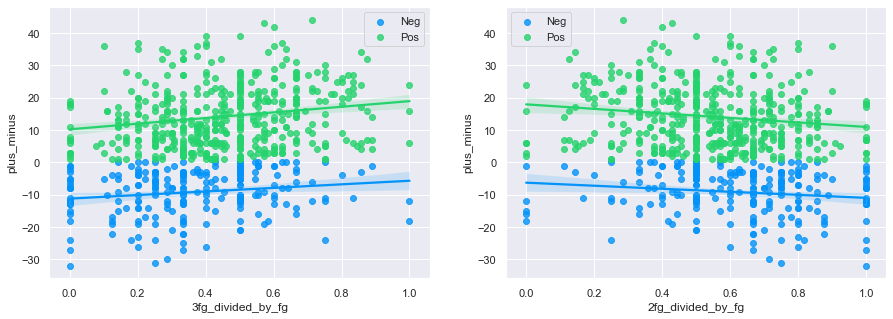

In [106]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['3fg_divided_by_fg'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['3fg_divided_by_fg'], df_pos_pm['plus_minus'], label='Pos')

ax1.legend()

ax2 = plt.subplot(1, 2, 2)

sns.regplot(df_neg_pm['2fg_divided_by_fg'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['2fg_divided_by_fg'], df_pos_pm['plus_minus'], label='Pos')

ax2.legend()

In [107]:
df_neg_pm['pts_per_min'] = df_neg_pm['pts'] / df_neg_pm['time played']
df_pos_pm['pts_per_min'] = df_pos_pm['pts'] / df_pos_pm['time played']

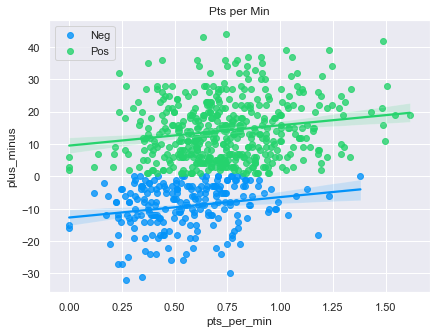

In [108]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['pts_per_min'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['pts_per_min'], df_pos_pm['plus_minus'], label='Pos')

ax1.set_title('Pts per Min')
ax1.legend()

In [109]:
df_neg_pm['pts_per_fg'] = df_neg_pm['pts'] / df_neg_pm['fg']
df_pos_pm['pts_per_fg'] = df_pos_pm['pts'] / df_pos_pm['fg']

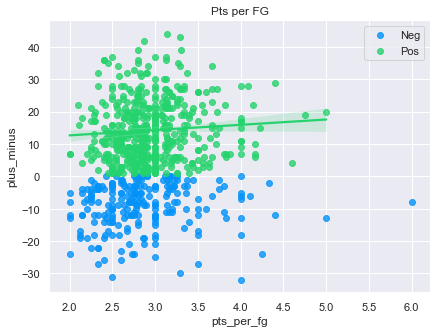

In [110]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['pts_per_fg'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['pts_per_fg'], df_pos_pm['plus_minus'], label='Pos')

ax1.set_title('Pts per FG')
ax1.legend()

In [111]:
df_neg_pm['FT+FG3'] = df_neg_pm['ft'] + df_neg_pm['fg3']
df_pos_pm['FT+FG3'] = df_pos_pm['ft'] + df_pos_pm['fg3']

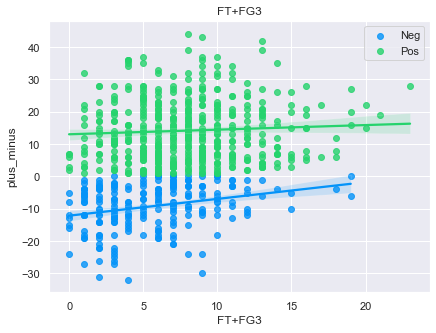

In [112]:
fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['FT+FG3'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['FT+FG3'], df_pos_pm['plus_minus'], label='Pos')


ax1.set_title('FT+FG3')
ax1.legend()

In [113]:
df_neg_pm['ppp'] = df_neg_pm['pts'] / (df_neg_pm['fga'] + 0.44 * df_neg_pm['fta'] + df_neg_pm['tov']).replace(0, np.inf)
df_pos_pm['ppp'] = df_pos_pm['pts'] / (df_pos_pm['fga'] + 0.44 * df_pos_pm['fta'] + df_pos_pm['tov']).replace(0, np.inf)

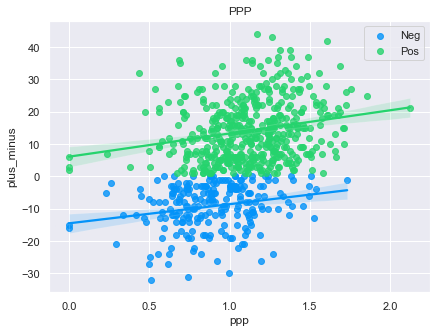

In [114]:
# Points per Possession.

fig = plt.figure(1, figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['ppp'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['ppp'], df_pos_pm['plus_minus'], label='Pos')


ax1.set_title('PPP')
ax1.legend()

# Defensive Features Analysis

In [115]:
width = 16.5
height = 21.5

In [116]:
defense

['stl', 'blk', 'pf', 'tov']

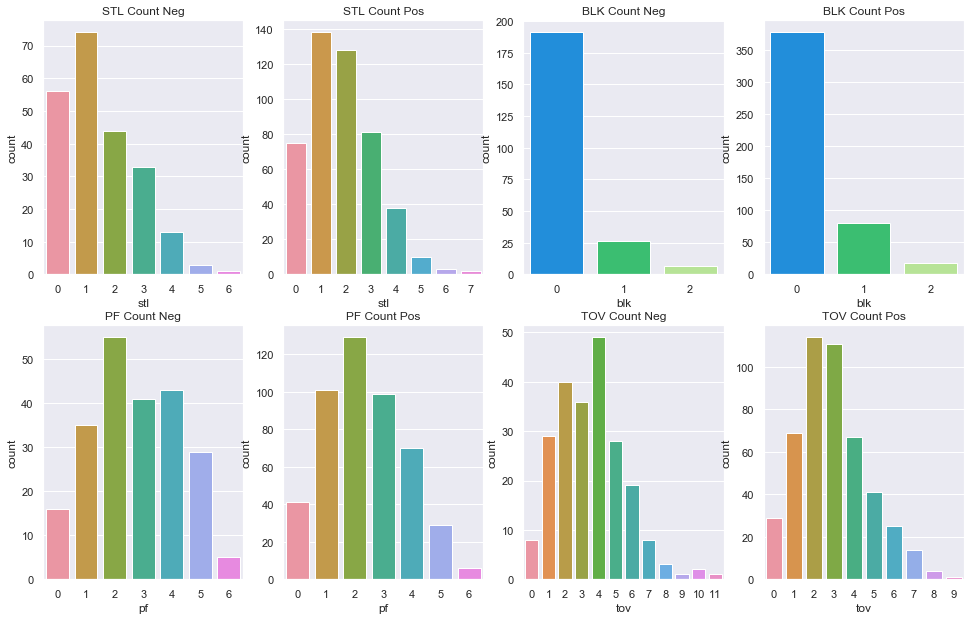

In [117]:
fig = plt.figure(1, figsize=(width, height))
i = 0

for col in defense:
    i += 1
    ax1 = plt.subplot(len(defense), 4, i)
    sns.countplot(df_neg_pm[col]) 
    ax1.set_title(f'{col.upper()} Count Neg')
    
    i += 1
    ax2 = plt.subplot(len(defense), 4, i)
    sns.countplot(df_pos_pm[col]) 
    ax2.set_title(f'{col.upper()} Count Pos')

In [118]:
df_neg_pm['stl_per_f'] = df_neg_pm['stl'] / df_neg_pm['pf']
df_pos_pm['stl_per_f'] = df_pos_pm['stl'] / df_pos_pm['pf']

df_neg_pm['blk_per_f'] = df_neg_pm['blk'] / df_neg_pm['pf']
df_pos_pm['blk_per_f'] = df_pos_pm['blk'] / df_pos_pm['pf']

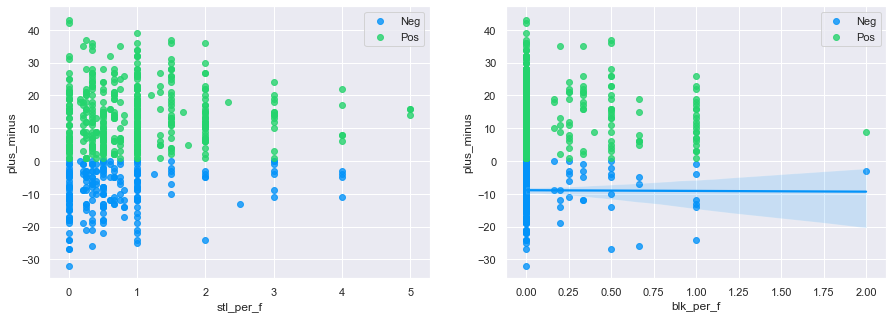

In [119]:
fig = plt.figure(1, figsize=(15, 5))
ax = plt.subplot(1, 2, 1)

sns.regplot(df_neg_pm['stl_per_f'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['stl_per_f'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

ax2 = plt.subplot(1, 2, 2)

sns.regplot(df_neg_pm['blk_per_f'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['blk_per_f'], df_pos_pm['plus_minus'], label='Pos')

ax2.legend()

# Rebounds

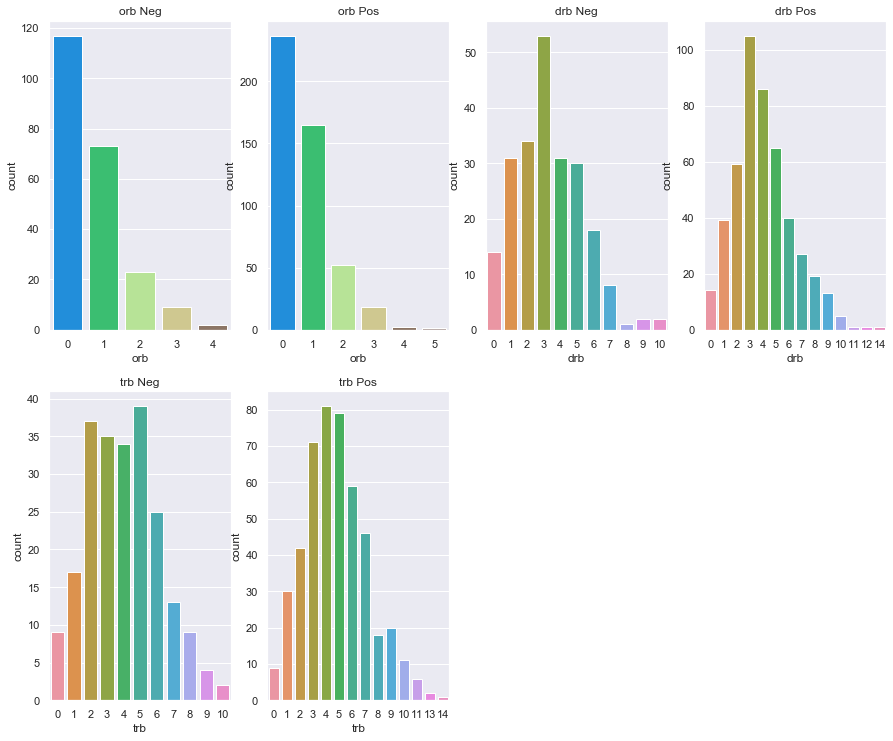

In [120]:
fig = plt.figure(1, figsize=(15, 12.5))
i = 0
rows = (len(rebounds) // 2) + 1

for rebound in rebounds:
    i += 1
    ax1 = plt.subplot(rows, 4, i)
    sns.countplot(df_neg_pm[rebound])
    ax1.set_title(f'{rebound} Neg')
    
    i += 1
    ax2 = plt.subplot(rows, 4, i)
    sns.countplot(df_pos_pm[rebound])
    ax2.set_title(f'{rebound} Pos')

In [121]:
df_neg_pm['orb_trb_ratio'] = df_neg_pm['orb'] / df_neg_pm['trb']
df_pos_pm['orb_trb_ratio'] = df_pos_pm['orb'] / df_pos_pm['trb']

df_neg_pm['drb_trb_ratio'] = df_neg_pm['drb'] / df_neg_pm['trb']
df_pos_pm['drb_trb_ratio'] = df_pos_pm['drb'] / df_pos_pm['trb']

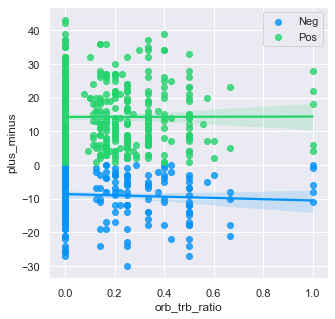

In [122]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['orb_trb_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['orb_trb_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

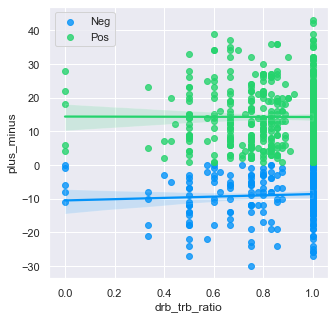

In [123]:
fig = plt.figure(1, figsize=(5, 5))
ax = plt.subplot(1, 1, 1)

sns.regplot(df_neg_pm['drb_trb_ratio'], df_neg_pm['plus_minus'], label='Neg')
sns.regplot(df_pos_pm['drb_trb_ratio'], df_pos_pm['plus_minus'], label='Pos')

ax.legend()

# Plus Minus Data Correlation Analysis

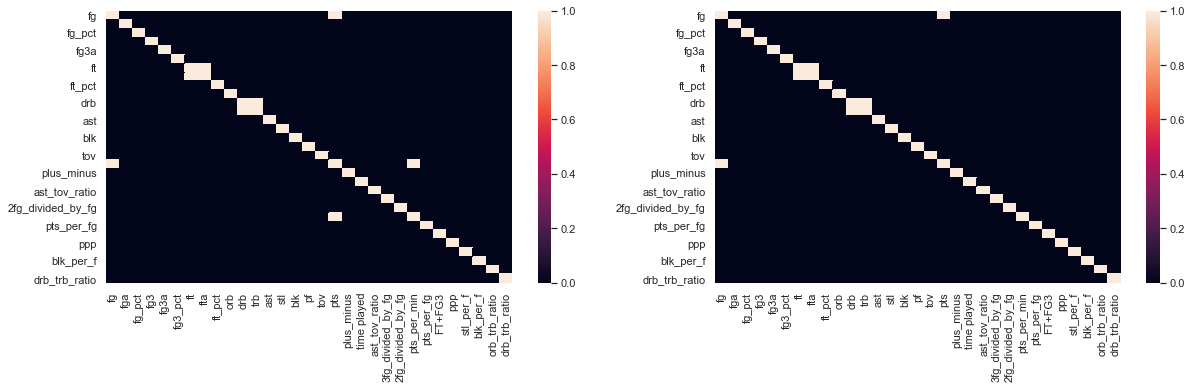

In [124]:
fig = plt.figure(figsize=(20, 5))
corr_cutoff = 0.9

ax = plt.subplot(1, 2, 1)
sns.heatmap(df_neg_pm.corr() > corr_cutoff)

ax = plt.subplot(1, 2, 2)
sns.heatmap(df_pos_pm.corr() > corr_cutoff)

In [125]:
# Created vs Lost Possessions.

df_pos_pm['net_pos_responsible_for'] = df_pos_pm['fg'] + df_pos_pm['ast'] + df_pos_pm['stl'] + df_pos_pm['blk'] - df_pos_pm['tov']
df_neg_pm['net_pos_responsible_for'] = df_neg_pm['fg'] + df_neg_pm['ast'] + df_neg_pm['stl'] + df_neg_pm['blk'] - df_neg_pm['tov']

Text(0.5, 1.0, 'Net Pos for Pos +/-')

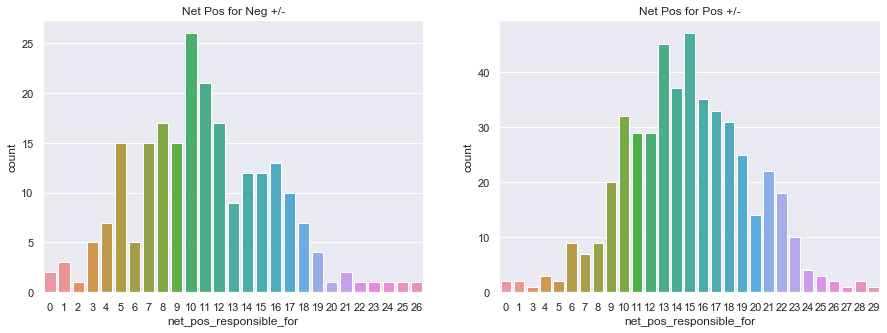

In [126]:
fig = plt.figure(1, figsize=(15, 5))
i = 0

ax = plt.subplot(1, 2, 1)
sns.countplot(df_neg_pm['net_pos_responsible_for'])
ax.set_title('Net Pos for Neg +/-')


ax = plt.subplot(1, 2, 2)
sns.countplot(df_pos_pm['net_pos_responsible_for'])
ax.set_title('Net Pos for Pos +/-')